### $${\bf{\color{blue}{\text{Ex. 3}}}}$$

#### ${\bf{\text{Table of Contents:}}}$
$\newline$
- [${\bf{\text{Data Loading}}}$](#1)
$\newline$
- [${\bf{\text{Data Reshaping}}}$](#2)
$\newline$
- [${\bf{\text{Plotting}}}$](#3)
$\newline$
- [${\bf{\text{Data Splitting}}}$](#4)
$\newline$
- [${\bf{\text{Data Scaling}}}$](#6)
$\newline$
- [${\bf{\text{K-fold}}}$](#5)
$\newline$
- [${\bf{\text{Data Asigning}}}$](#8)
$\newline$
- [${\bf{\text{NMF}}}$](#7)
$\newline$
- [${\bf{\text{Hyperparameter Tuning for SVC}}}$](#9)
$\newline$
- [${\bf{\text{Test}}}$](#10)
$\newline$

- [ ] **Task 1**

In [1]:
import os
import numpy as np
import pandas as pd
import pymatreader as pymat
from termcolor import colored
import matplotlib.pyplot as plt

- <a name='1'>${\bf{\text{Data Loading}}}$</a>

In [2]:
file_name_gt_str = 'Indian_pines_gt.mat'
file_name_all_str = 'Indian_pines.mat'
file_name_corr_str = 'Indian_pines_corrected.mat'
path_str = os.getcwd() + '/'

In [3]:
data_gt_ndarray = pymat.read_mat(path_str + file_name_gt_str)['indian_pines_gt']
data_main_ndarray = pymat.read_mat(path_str + file_name_all_str)['indian_pines']
data_corr_ndarray = pymat.read_mat(path_str + file_name_corr_str)['indian_pines_corrected']

In [4]:
print(f'\nType of the {colored("main data", "green")}: {type(data_main_ndarray)}')
print(f'Shape of the {colored("main data", "green")}: {data_main_ndarray.shape}\n\n')

print(f'Shape of the {colored("corrected data", "green")}: {data_corr_ndarray.shape}')
print(f' ... and its data type: {colored(data_corr_ndarray.dtype, "green")}')

print(f'\n\n{colored("Labels", "green")}:\n\n{data_gt_ndarray}\n\n ... and its data type: \
{colored(data_gt_ndarray.dtype, "green")}\n ... and its shape: {colored(data_gt_ndarray.shape, "green")}\n')

print(f' ... and its {colored("Classes", "green")}: {np.unique(data_gt_ndarray)}')


Type of the main data: <class 'numpy.ndarray'>
Shape of the main data: (145, 145, 220)


Shape of the corrected data: (145, 145, 200)
 ... and its data type: uint16


Labels:

[[3 3 3 ... 0 0 0]
 [3 3 3 ... 0 0 0]
 [3 3 3 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

 ... and its data type: uint8
 ... and its shape: (145, 145)

 ... and its Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


- <a name='2'>${\bf{\text{Data Reshaping}}}$</a>

In [5]:
data_corr_reshaped_ndarray = data_corr_ndarray.reshape((data_corr_ndarray.shape[0]*data_corr_ndarray.shape[1], \
data_corr_ndarray.shape[2]))

data_gt_reshaped_ndarray = data_gt_ndarray.flatten()

In [6]:
print(f'\nShape of the {colored("reshaped corrected data", "green")}: {data_corr_reshaped_ndarray.shape} = \
(No. samples, No. features)\n')

print(f'\nShape of the {colored("reshaped label data", "green")}: \
{data_gt_reshaped_ndarray.shape} = (No.targets,)\n')


Shape of the reshaped corrected data: (21025, 200) = (No. samples, No. features)


Shape of the reshaped label data: (21025,) = (No.targets,)



- <a name='3'>${\bf{\text{Plotting}}}$</a>

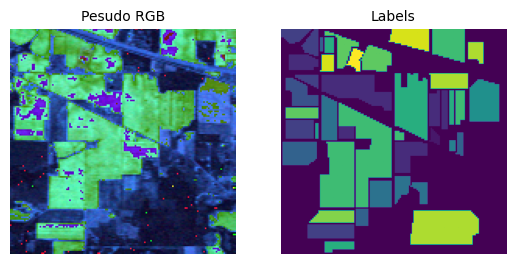

In [7]:
data_plot_ndarray = data_main_ndarray[:, :, [110, 200, 180]].astype(np.uint8)

plt.figure(1)
plt.subplot(1, 2, 1), plt.imshow(data_plot_ndarray), plt.title('Pesudo RGB', fontsize=10), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(data_gt_ndarray), plt.title('Labels', fontsize=10), plt.axis('off')
plt.show()

- [x] **Task 1**

- [ ] **Task 2**

In [112]:
from sklearn.svm import SVC
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, cohen_kappa_score, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

- <a name='4'>${\bf{\text{Data Splitting}}}$</a>

In [9]:
train_size_list = [0.02, 0.05, 0.1]
data = {}
for train_size_float in train_size_list:
    data['X_train_' + str(train_size_float)], data['X_test_' + str(train_size_float)], \
    data['y_train_' + str(train_size_float)], data['y_test_' + str(train_size_float)] =\
    train_test_split(data_corr_reshaped_ndarray, data_gt_reshaped_ndarray, train_size=\
    train_size_float, random_state=0)

In [10]:
for i, train_size_float in enumerate(train_size_list):
    print(f'\n   Train size: {colored(train_size_float, "blue")}\n')
    print(f'Size of {colored("X_train", "green")}: {data["X_train_" + str(train_size_float)].shape}')
    print(f'Size of {colored("X_test", "green")}: {data["X_test_" + str(train_size_float)].shape}')
    print(f'Size of {colored("y_train", "green")}: {data["y_train_" + str(train_size_float)].shape}')
    text = f'Size of {colored("y_test", "green")}: {data["y_test_" + str(train_size_float)].shape}\n'
    if i != len(train_size_list) - 1: text += '\n\n\n'
    print(text)


   Train size: 0.02

Size of X_train: (420, 200)
Size of X_test: (20605, 200)
Size of y_train: (420,)
Size of y_test: (20605,)





   Train size: 0.05

Size of X_train: (1051, 200)
Size of X_test: (19974, 200)
Size of y_train: (1051,)
Size of y_test: (19974,)





   Train size: 0.1

Size of X_train: (2102, 200)
Size of X_test: (18923, 200)
Size of y_train: (2102,)
Size of y_test: (18923,)



- <a name='6'>${\bf{\text{Data Scaling(X)}}}$</a>
> ${\bf{\color{red}{\text{Note: }}}}{\bf{\color{black}{\text{Name of the New Data: }{\color{green}{\text{data_scaled(Dict)}}}}}}$

In [22]:
train_size_list = [0.02, 0.05, 0.1]
data_scaled = {}
min_max_scaler = MinMaxScaler()

for train_size in train_size_list:
    data_scaled['X_train_' + str(train_size)] = min_max_scaler.fit_transform(data['X_train_' + str(train_size)])
    data_scaled['X_test_' + str(train_size)] = min_max_scaler.fit_transform(data['X_test_' + str(train_size)])
    data_scaled['y_train_' + str(train_size)] = data['y_train_' + str(train_size)]
    data_scaled['y_test_' + str(train_size)] = data['y_test_' + str(train_size)]

In [23]:
for train_size in train_size_list:
    print(f'\n        Train Size = {colored(train_size, "blue")}\n')
    print(f'Min of X_train: {colored((data_scaled["X_train_" + str(train_size)]).min(), "magenta")}')
    print(f'Max of X_train: {colored((data_scaled["X_train_" + str(train_size)]).max(), "magenta")}\n')
    print(f'Min of X_test: {colored((data_scaled["X_test_" + str(train_size)]).min(), "magenta")}')
    print(f'Max of X_test: {colored((data_scaled["X_test_" + str(train_size)]).max(), "magenta")}\n\n')


        Train Size = 0.02

Min of X_train: 0.0
Max of X_train: 1.0000000000000004

Min of X_test: 0.0
Max of X_test: 1.0000000000000004



        Train Size = 0.05

Min of X_train: 0.0
Max of X_train: 1.0000000000000018

Min of X_test: 0.0
Max of X_test: 1.0000000000000004



        Train Size = 0.1

Min of X_train: 0.0
Max of X_train: 1.0000000000000018

Min of X_test: 0.0
Max of X_test: 1.0000000000000004




- <a name='5'>${\bf{\text{K-fold}}}$</a>

In [24]:
train_size_tuple = (0.02, 0.05, 0.1)
k_fold_tuple = range(2, 16)

parameters_for_k_fold_dict = {'train_size': train_size_tuple, 'k_fold': k_fold_tuple}
total_length = 1
for key_name_str in parameters_for_k_fold_dict.keys():
    total_length *= len(parameters_for_k_fold_dict[key_name_str])
    
    
train_size_stored_values = np.zeros(total_length)
acc_mean_stored_values = np.zeros(total_length)
k_fold_stored_values = np.zeros(total_length)


clf_without_pca = SVC()
count = 0
for train_size in parameters_for_k_fold_dict['train_size']:
    X_train, y_train, X_test, y_test = data_scaled['X_train_' + str(train_size)], \
    data_scaled['y_train_' + str(train_size)], \
    data_scaled['X_test_' + str(train_size)], data_scaled['y_test_' + str(train_size)]
    clf_without_pca.fit(X_train, y_train)
    for k_fold in parameters_for_k_fold_dict['k_fold']:
        count += 1
        scores = cross_val_score(clf_without_pca, X_train, y_train, cv=k_fold)
        acc_mean = scores.mean()
        train_size_stored_values[count - 1] = train_size
        acc_mean_stored_values[count - 1] = acc_mean
        k_fold_stored_values[count - 1] = k_fold
        
df_for_k_fold = pd.DataFrame({'Train Size': train_size_stored_values, 'K-fold(CV)': k_fold_stored_values,\
'Mean of Accuracy': acc_mean_stored_values})

/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(


In [25]:
df_for_k_fold

,Train Size,K-fold(CV),Mean of Accuracy
0,0.02,2.0,0.595238
1,0.02,3.0,0.609524
2,0.02,4.0,0.602381
3,0.02,5.0,0.609524
4,0.02,6.0,0.607143
5,0.02,7.0,0.609524
6,0.02,8.0,0.602368
7,0.02,9.0,0.607051
8,0.02,10.0,0.607143
9,0.02,11.0,0.602319


In [26]:
df1 = df_for_k_fold[df_for_k_fold['Train Size'] == 0.02]
df1

,Train Size,K-fold(CV),Mean of Accuracy
0,0.02,2.0,0.595238
1,0.02,3.0,0.609524
2,0.02,4.0,0.602381
3,0.02,5.0,0.609524
4,0.02,6.0,0.607143
5,0.02,7.0,0.609524
6,0.02,8.0,0.602368
7,0.02,9.0,0.607051
8,0.02,10.0,0.607143
9,0.02,11.0,0.602319


In [27]:
df1_result = df1[df1['Mean of Accuracy'] == (df1['Mean of Accuracy']).max()]
df1_result

,Train Size,K-fold(CV),Mean of Accuracy
1,0.02,3.0,0.609524
3,0.02,5.0,0.609524


In [29]:
print(f'\nThe Best {colored("K-fold", "blue")} for Train_Size = {colored(df1_result["Train Size"][3], "green")}: \
{colored(df1_result["K-fold(CV)"][3], "blue")}\n')


The Best K-fold for Train_Size = 0.02: 5.0



In [30]:
df2 = df_for_k_fold[df_for_k_fold['Train Size'] == 0.05]
df2

,Train Size,K-fold(CV),Mean of Accuracy
14,0.05,2.0,0.599435
15,0.05,3.0,0.603240
16,0.05,4.0,0.602281
17,0.05,5.0,0.597531
18,0.05,6.0,0.607062
19,0.05,7.0,0.602296
20,0.05,8.0,0.605179
21,0.05,9.0,0.603219
22,0.05,10.0,0.603243
23,0.05,11.0,0.606110


In [31]:
df2_result = df2[df2['Mean of Accuracy'] == (df2['Mean of Accuracy']).max()]
df2_result

,Train Size,K-fold(CV),Mean of Accuracy
24,0.05,12.0,0.60802


In [32]:
print(f'\nThe Best {colored("K-fold", "blue")} for Train_Size = {colored(df2_result["Train Size"][24], "green")}: \
{colored(df2_result["K-fold(CV)"][24], "blue")}\n')


The Best K-fold for Train_Size = 0.05: 12.0



In [33]:
df3 = df_for_k_fold[df_for_k_fold['Train Size'] == 0.1]
df3

,Train Size,K-fold(CV),Mean of Accuracy
28,0.1,2.0,0.617507
29,0.1,3.0,0.626545
30,0.1,4.0,0.626543
31,0.1,5.0,0.630823
32,0.1,6.0,0.627970
33,0.1,7.0,0.632250
34,0.1,8.0,0.632265
35,0.1,9.0,0.630349
36,0.1,10.0,0.630339
37,0.1,11.0,0.631299


In [34]:
df3_result = df3[df3['Mean of Accuracy'] == (df3['Mean of Accuracy']).max()]
df3_result

,Train Size,K-fold(CV),Mean of Accuracy
34,0.1,8.0,0.632265


In [35]:
print(f'\nThe Best {colored("K-fold", "blue")} for Train_Size = {colored(df3_result["Train Size"][34], "green")}: \
{colored(df3_result["K-fold(CV)"][34], "blue")}\n')


The Best K-fold for Train_Size = 0.1: 8.0



- <a name='8'>${\bf{\text{Data Asigning}}}$</a>

In [36]:
input_data = {}
train_size = 0.02

input_data['X_train_' + str(train_size)] = data_scaled['X_train_' + str(train_size)]
input_data['y_train_' + str(train_size)] = data_scaled['y_train_' + str(train_size)]

input_data['X_test_' + str(train_size)] = data_scaled['X_test_' + str(train_size)]
input_data['y_test_' + str(train_size)] = data_scaled['y_test_' + str(train_size)]

- <a name='7'>${\bf{\text{NMF}}}$</a>

In [102]:
max_iterations = 23 * X_train.shape[1]
nmf = NMF(n_components=10, random_state=0, max_iter=max_iterations)

In [50]:
X_train, y_train = input_data['X_train_' + str(train_size)], \
input_data['y_train_' + str(train_size)]

X_test, y_test =  (input_data['X_test_' + str(train_size)])[: len(X_train)], \
(input_data['y_test_' + str(train_size)])[: len(y_train)]

In [43]:
print(f'\nShape of the {colored("X_train", "blue")}: {X_train.shape}\n')
print(f'\nShape of the {colored("y_train", "blue")}: {y_train.shape}\n')
print(f'\nShape of the {colored("X_test", "blue")}: {X_test.shape}\n')
print(f'\nShape of the {colored("y_test", "blue")}: {y_test.shape}\n')


Shape of the X_train: (420, 200)


Shape of the y_train: (420,)


Shape of the X_test: (420, 200)


Shape of the y_test: (420,)



In [103]:
X_train_reduced = nmf.fit_transform(X_train)
X_test_reduced = nmf.fit_transform(X_test)

y_train_reduced = y_train
y_test_reduced = y_test

In [104]:
print(f'\n      Result of the {colored("MNF", "magenta")}')
print(f'\nShape of the {colored("X_train", "blue")}: {X_train_reduced.shape}\n')
print(f'\nShape of the {colored("X_test", "blue")}: {X_test_reduced.shape}\n')


      Result of the MNF

Shape of the X_train: (420, 10)


Shape of the X_test: (420, 10)



- [x] **Task 2**

- [ ] **Task 3**

- <a name='9'>${\bf{\text{Hyperparameter Tuning for SVC}}}$</a>

In [107]:
k_fold_dict = {0.02: 5, 0.05: 12, 0.1: 8}

In [108]:
svc = SVC(random_state=0)

In [109]:
pipe = Pipeline(steps=[("svc", svc)])
param_grid = {"svc__C": np.logspace(-4, 4, 9), 'svc__kernel': ['linear', 'poly', 'rbf'], \
              'svc__gamma': np.linspace(0, 1, 11), 'svc__degree': [2, 3, 4]}

In [113]:
search = GridSearchCV(pipe, param_grid, cv=k_fold_dict[train_size])
search.fit(X_train, y_train)

/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
405 fits failed out of a total of 4455.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/shahin/.local/lib/python3.10/site-packages/sklearn/pipeline.py", line 382, in fi

GridSearchCV(cv=5, estimator=Pipeline(steps=[('svc', SVC(random_state=0))]),
             param_grid={'svc__C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04]),
                         'svc__degree': [2, 3, 4],
                         'svc__gamma': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'svc__kernel': ['linear', 'poly', 'rbf']})

In [114]:
best_params = search.best_params_

print(f"\n\u03BB = {best_params['svc__C']}\n\nkernel = {best_params['svc__kernel']}\n\nDegree = \
{best_params['svc__degree']}\n\n\u03B3 = {best_params['svc__gamma']}\n")


λ = 0.0001

kernel = poly

Degree = 4

γ = 0.4



In [115]:
best_score = search.best_score_
print(f'\nBest Accuracy is: {best_score}\n')


Best Accuracy is: 0.6642857142857143



- [x] **Task 3**

- [ ] **Task 4**

- <a name='10'>${\bf{\text{Test}}}$</a>

In [117]:
clf = SVC(C=0.0001, kernel='poly', degree=4, gamma=0.4, random_state=0)

In [118]:
clf.fit(X_train_reduced, y_train_reduced)

SVC(C=0.0001, degree=4, gamma=0.4, kernel='poly', random_state=0)

In [119]:
y_pred = clf.predict(X_test_reduced)
ov_acc = accuracy_score(y_test_reduced, y_pred)
conf_mat = confusion_matrix(y_test_reduced, y_pred)
kappa = cohen_kappa_score(y_test_reduced, y_pred)

In [120]:
acc_for_each_class = conf_mat.diagonal()/conf_mat.sum(axis=1)

df_result1 = pd.DataFrame({'Class': range(1, 17), 'Accuracy': acc_for_each_class})
df_result1

,Class,Accuracy
0,1,1.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
5,6,0.0
6,7,0.0
7,8,0.0
8,9,0.0
9,10,0.0


In [121]:
df_result2 = pd.DataFrame({'Overall Accuracy': ov_acc, '\u03BA': kappa}, index=[0])
print(f'\nPipeline: {colored("Input Data", "blue")}  --->  {colored("Standard Scaler", "magenta")}  \
--->  {colored("NMF", "magenta")}  --->  {colored("SVC", "magenta")}')
df_result2


Pipeline: Input Data  --->  Standard Scaler  --->  NMF  --->  SVC


,Overall Accuracy,κ
0,0.514286,0.0


- <a name='11'>${\bf{\text{Conclusion:}}}$</a>
$\newline$
$\newline$
- - ${{\text{Cross-validation(CV) Accuracy = 66}\%}}$
$\newline$
- - ${\text{Test Accuracy = 51}\%}$
$\newline$
[//]:#
${\rightarrow}{\color{red}{\bf{\text{ Overfitting}}}}$
$\newline$

- [x] **Task 4**